#### ADS 509
#### Assignment 2
#### Abby Tan
#### GitHub Link: https://github.com/Abby-Tan/ADS509_Assignment_2

# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [2]:
pip install emoji

  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212377 sha256=c23006e865529c5f34c8f2230232f2e35ab4ce8e42cb77fb2f29dd4f486a9450
  Stored in directory: c:\users\abby0\appdata\local\pip\cache\wheels\ae\80\43\3b56e58669d65ea9ebf38b9574074ca248143b61f45e114a6b
Successfully built emoji
Note: you may need to restart the kernel to use updated packages.


In [264]:
pip install lexical-diversity

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abby0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
sw = stopwords.words("english")

In [265]:
# Add any additional import statements you need here
import string
from lexical_diversity import lex_div as ld


In [5]:
# change `data_location` to the location of the folder on your machine.
data_location = "C:/Users/abby0/OneDrive/Desktop/MSADS/ADS-509 Applied Text Mining/Module 2/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [6]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = 13
    num_unique_tokens = 9
    lexical_diversity = 0.69
    num_characters = 55
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [7]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.690 in the data.


Q: Why is it beneficial to use assertion statements in your code? 

A: The assertion statements are beneficial for debugging. It will raise errors if the condition from the assertion statement is false.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




### Read in the lyrics data

In [759]:
artist_folders = os.listdir("lyrics/")
artist_folders = [f for f in artist_folders if os.path.isdir("lyrics/" + f)]

In [760]:
artists = []
songs = []
lyrics = []

In [761]:
for artist in artist_folders:
    artist_files = os.listdir("lyrics/" + artist)
    artist_files = [f for f in artist_files if 'txt' in f or 'csv' in f or 'tsv' in f]
    for f_name in artist_files:
        with open("lyrics/" + artist + "/" + f_name) as infile:
            artists.append(artist)
            songs.append(f_name)
            lyrics.append(infile.read())

In [762]:
df_lyrics = pd.DataFrame({'artists':artists,
                          'songs'  :songs,
                          'lyrics' :lyrics })

In [763]:
df_lyrics['songs'] = df_lyrics['songs'].str.replace('joji_','')
df_lyrics['songs'] = df_lyrics['songs'].str.replace('postmalone_','')
df_lyrics['songs'] = df_lyrics['songs'].str.replace('.txt','')
df_lyrics['songs'] = df_lyrics['songs'].str.replace('_',' ')

In [764]:
df_lyrics.head(3)

,artists,songs,lyrics
0,Joji,amazonian pet,"amazonian pet\n\nI'm an old man rich, amazonia..."
1,Joji,attention,"attention\n\nGirl, would it kill you just to t..."
2,Joji,bitter fuck,bitter fuck\n\nI find it hard to be myself\nI ...


### Read in the twitter data

In [583]:
PostMalone_df = pd.read_csv(data_location + twitter_folder + 'PostMalone_follower_data.txt', sep='\t')
PostMalone_df['artists'] = 'PostMalone'
PostMalone_df = PostMalone_df[['artists','description']]

In [654]:
Joji_df = pd.read_csv(data_location + twitter_folder + 'sushitrash_follower_data.txt', sep='\t')
Joji_df['artists'] = 'Joji'
Joji_df = Joji_df[['artists','description']]

In [666]:
df_twitter = pd.concat([PostMalone_df, Joji_df])

In [667]:
df_twitter.head(3)

,artists,description
0,PostMalone,Hi People I'm Republican I Rap sing and do reg...
1,PostMalone,hi!
2,PostMalone,NaN


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [668]:
punctuation = set(punctuation) # speeds up comparison

In [669]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ')
    return text

# reference: https://stackoverflow.com/questions/39782418/remove-punctuations-in-pandas

### create your clean twitter data here

In [670]:
# remove punctuation
df_twitter['desc_2'] = df_twitter['description'].astype(str)
df_twitter["desc_2"] = df_twitter['desc_2'].apply(remove_punctuations)

In [671]:
# split on whitespace
df_twitter['desc_2'] = df_twitter['desc_2'].str.replace('\n', ' ')

In [672]:
# lowercase
df_twitter = df_twitter.apply(lambda x: x.astype(str).str.lower())

In [673]:
# remove stopwords
df_twitter['desc_2'] = df_twitter['desc_2'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw)]))

# reference: https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe

In [674]:
df_twitter.head(3)

,artists,description,desc_2
0,postmalone,hi people i'm republican i rap sing and do reg...,hi people republican rap sing reggae music man...
1,postmalone,hi!,hi
2,postmalone,nan,nan


### create your clean lyrics data here

In [774]:
# remove punctuation
df_lyrics['lyrics_2'] = df_lyrics['lyrics'].astype(str)
df_lyrics['lyrics_2'] = df_lyrics['lyrics_2'].apply(remove_punctuations)

In [775]:
# split on whitespace
df_lyrics['lyrics_2'] = df_lyrics['lyrics_2'].str.replace('\n', ' ')

In [776]:
# lowercase
df_lyrics = df_lyrics.apply(lambda x: x.astype(str).str.lower())

In [777]:
# remove stopwords
df_lyrics['lyrics_2'] = df_lyrics['lyrics_2'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw)]))

In [778]:
df_lyrics.head(3)

,artists,songs,lyrics,lyrics_len,lyrics_2
0,joji,amazonian pet,"amazonian pet\n\ni'm an old man rich, amazonia...",1,amazonian pet old man rich amazonian pet rap g...
1,joji,attention,"attention\n\ngirl, would it kill you just to t...",1,attention girl would kill throw little bit att...
2,joji,bitter fuck,bitter fuck\n\ni find it hard to be myself\ni ...,1,bitter fuck find hard shed skin everybody else...


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [680]:
def descriptive_stats(tokens_list, tokens_text, verbose=True):
    
    num_tokens = len(tokens_list)
    num_unique_tokens = len(set(tokens_list))
    num_characters = len(tokens_text)
    lexical_diversity = ld.ttr(tokens_list)
    most_common_5 = Counter(tokens_list).most_common(5)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
    # print the five most common tokens    
        print(f"The five most common tokens are {most_common_5} in the data.")   

In [681]:
# twitter description
postmalone_desc = df_twitter[df_twitter['artists'] == 'postmalone'][['desc_2']]
postmalone_desc_text = re.sub('\s+\.','.', ' '.join(postmalone_desc['desc_2']))
postmalone_desc_list = postmalone_desc_text.split()

joji_desc = df_twitter[df_twitter['artists'] == 'joji'][['desc_2']]
joji_desc_text = re.sub('\s+\.','.', ' '.join(joji_desc['desc_2']))
joji_desc_list = joji_desc_text.split()

# song lyrics
postmalone_lyrics = df_lyrics[df_lyrics['artists'] == 'postmalone'][['lyrics_2']]
postmalone_lyrics_text = re.sub('\s+\.','.', ' '.join(postmalone_lyrics['lyrics_2']))
postmalone_lyrics_list = postmalone_lyrics_text.split()

joji_lyrics = df_lyrics[df_lyrics['artists'] == 'joji'][['lyrics_2']]
joji_lyrics_text = re.sub('\s+\.','.', ' '.join(joji_lyrics['lyrics_2']))
joji_lyrics_list = joji_lyrics_text.split()

In [682]:
print('Descriptive statistics for Post Malone follower description:')
descriptive_stats(postmalone_desc_list, postmalone_desc_text, verbose=True)
print('\nDescriptive statistics for Joji follower description:')
descriptive_stats(joji_desc_list, joji_desc_text, verbose=True)
print('\nDescriptive statistics for Post Malone lyrics:')
descriptive_stats(postmalone_lyrics_list, postmalone_lyrics_text, verbose=True)
print('\nDescriptive statistics for Joji lyrics:')
descriptive_stats(joji_lyrics_list, joji_lyrics_text, verbose=True)

Descriptive statistics for Post Malone follower description:
There are 340606 tokens in the data.
There are 77541 unique tokens in the data.
There are 1975435 characters in the data.
The lexical diversity is 0.228 in the data.
The five most common tokens are [('nan', 33505), ('co', 2029), ('de', 1956), ('https', 1911), ('•', 1909)] in the data.

Descriptive statistics for Joji follower description:
There are 425390 tokens in the data.
There are 81009 unique tokens in the data.
There are 2718991 characters in the data.
The lexical diversity is 0.190 in the data.
The five most common tokens are [('nan', 54672), ('music', 3922), ('co', 3447), ('love', 3008), ('och', 2275)] in the data.

Descriptive statistics for Post Malone lyrics:
There are 4277 tokens in the data.
There are 1066 unique tokens in the data.
There are 24264 characters in the data.
The lexical diversity is 0.249 in the data.
The five most common tokens are [('yeah', 140), ('know', 86), ('like', 85), ('got', 72), ('wanna', 

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: The top five words will most likely be the stopwords if we don't remove them.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: My prior belief is the artists should have low lexical diversity, especially in their lyrics. My assumption is each of the artists have their personal style when writing songs and have preferences and favor vocabulary to use. By looking at the descriptive statistics, both of the two artists have low lexical diversity of 0.249 and 0.282. This conforms to my prior belifes.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [457]:
def is_emoji(s):
    # return(s in emoji.UNICODE_EMOJI['en'])
    return(emoji.is_emoji(s))
assert(is_emoji("❤️"))
assert(not is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [683]:
# Your code here
postmalone_emoji = []
for text in postmalone_desc_list:
    if is_emoji(text):
        postmalone_emoji.append(text)

print('Top ten most common emojis for Post Malone are:')
print(Counter(postmalone_emoji).most_common(10))

Top ten most common emojis for Post Malone are:
[('✨', 327), ('🏳️\u200d🌈', 294), ('❤️', 232), ('🖤', 208), ('🇲🇽', 172), ('🤍', 170), ('💜', 166), ('🔞', 126), ('🦋', 102), ('🇵🇭', 97)]


In [684]:
joji_emoji = []
for text in joji_desc_list:
    if is_emoji(text):
        joji_emoji.append(text)

print('Top ten most common emojis for Joji are:')
print(Counter(joji_emoji).most_common(10))

Top ten most common emojis for Joji are:
[('♥', 356), ('❤️', 269), ('🏳️\u200d🌈', 245), ('❤', 211), ('✨', 150), ('🌈', 89), ('✌', 49), ('✌️', 48), ('🎶', 42), ('📸', 38)]


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [689]:
# twitter description with punctuation
postmalone_desc = df_twitter[df_twitter['artists'] == 'postmalone'][['description']]
postmalone_desc_text = re.sub('\s+\.','.', ' '.join(postmalone_desc['description']))
postmalone_desc_list = postmalone_desc_text.split()

joji_desc = df_twitter[df_twitter['artists'] == 'joji'][['description']]
joji_desc_text = re.sub('\s+\.','.', ' '.join(joji_desc['description']))
joji_desc_list = joji_desc_text.split()

In [692]:
# Your code here
postmalone_hashtag = []
for text in postmalone_desc_list:
    if re.findall(r"#(\w+)", text):
        postmalone_hashtag.append(text)
        
print('Top ten most common hashtags for PostMalone are:')
print(Counter(postmalone_hashtag).most_common(10))

# Reference: https://stackoverflow.com/questions/2527892/parsing-a-tweet-to-extract-hashtags-into-an-array

Top ten most common hashtags for PostMalone are:
[('#1', 122), ('#blacklivesmatter', 42), ('#blm', 38), ('#ez4ence', 17), ('#vtuber', 15), ('#bts', 14), ('#freepalestine', 12), ('#bitcoin', 12), ('#dubnation', 10), ('#stopasianhate', 9)]


In [693]:
joji_hashtag = []
for text in joji_desc_list:
    if re.findall(r"#(\w+)", text):
        joji_hashtag.append(text)
        
print('Top ten most common hashtags for PostMalone are:')
print(Counter(joji_hashtag).most_common(10))

Top ten most common hashtags for PostMalone are:
[('#blacklivesmatter', 78), ('#music', 72), ('#blm', 44), ('#1', 43), ('#edm', 36), ('#teamfollowback', 19), ('#art', 19), ('#dj', 15), ('#directioner', 15), ('#house', 14)]


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [734]:
# reuse the code from the top
artists = []
songs = []

for artist in artist_folders:
    artist_files = os.listdir("lyrics/" + artist)
    artist_files = [f for f in artist_files if 'txt' in f or 'csv' in f or 'tsv' in f]
    for f_name in artist_files:
        with open("lyrics/" + artist + "/" + f_name) as infile:
            artists.append(artist)
            songs.append(infile.readline())
            
df_lyrics = pd.DataFrame({'artists':artists,
                          'songs'  :songs })

df_lyrics['songs'] = df_lyrics['songs'].str.replace('\n', ' ')

In [750]:
# Your code here

In [745]:
# Post Malone
postmalone_songs = df_lyrics[df_lyrics['artists'] == 'PostMalone'][['songs']]
postmalone_songs_text = re.sub('\s+\.','.', ' '.join(postmalone_songs['songs']))
postmalone_songs_list = postmalone_songs_text.split()

In [747]:
print(Counter(postmalone_songs_list).most_common(5))

[('god', 2), ('40', 1), ('funk', 1), ('big', 1), ('lie', 1)]


In [748]:
# Joji
joji_songs = df_lyrics[df_lyrics['artists'] == 'Joji'][['songs']]
joji_songs_text = re.sub('\s+\.','.', ' '.join(joji_songs['songs']))
joji_songs_list = joji_songs_text.split()

In [749]:
print(Counter(joji_songs_list).most_common(5))

[('my', 2), ('i', 2), ('the', 2), ('in', 2), ('amazonian', 1)]


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.125;0.775x0.755)
Artist 2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

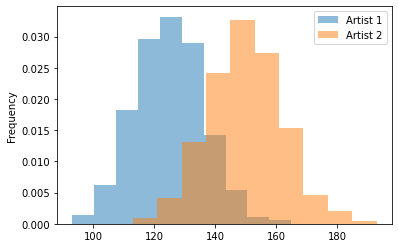

In [751]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: The reuglar expression of \s+ will match on one or more whitespace. 


In [752]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

In [ ]:
# Your lyric length comparison chart here. 

In [783]:
df_lyrics = df_lyrics[['artists', 'lyrics_2']]
df_lyrics.head(3)

,artists,lyrics_2
0,joji,amazonian pet old man rich amazonian pet rap g...
1,joji,attention girl would kill throw little bit att...
2,joji,bitter fuck find hard shed skin everybody else...


In [787]:
df_lyrics['lyrics_len'] = df_lyrics['lyrics_2'].str.split(' ').str.len()
df_lyrics.head(3)

<ipython-input-787-a2c4469e6652>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lyrics['lyrics_len'] = df_lyrics['lyrics_2'].str.split(' ').str.len()


,artists,lyrics_2,lyrics_len
0,joji,amazonian pet old man rich amazonian pet rap g...,94
1,joji,attention girl would kill throw little bit att...,85
2,joji,bitter fuck find hard shed skin everybody else...,73


artists
joji          AxesSubplot(0.125,0.125;0.775x0.755)
postmalone    AxesSubplot(0.125,0.125;0.775x0.755)
Name: lyrics_len, dtype: object

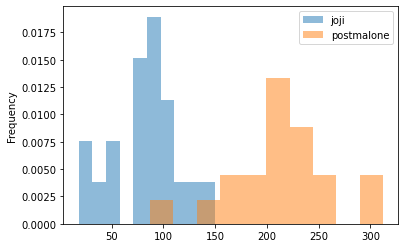

In [789]:
df_lyrics.groupby('artists')['lyrics_len'].plot(kind="hist",density=True,alpha=0.5,legend=True)

---